In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [366]:
data = pd.read_csv('../data/csv/cleaned/ta-lion-clean.csv')
data.head()

,text,label
0,masuk kabin sebelum take off dan keluar setela...,0
1,petugas lion air memasukkan sampah ke dalam ko...,0
2,"Ngantri sejam di check in counter, pelayananny...",0
3,pesawat saya dari pekanbaru ke batam jam 9 pag...,0
4,"Kalau masih sayang diri, keluarga, waktu dan k...",0


In [367]:
label_counts = data['label'].value_counts()
print('Jumlah data pada setiap nilai label:\n', label_counts)

Jumlah data pada setiap nilai label:
 1    309
0    199
Name: label, dtype: int64


In [368]:
print("Jumlah data: ", len(data))
print("Jumlah ulasan positif: ", data['label'].value_counts()[1])
print("Jumlah ulasan negatif: ", data['label'].value_counts()[0])

Jumlah data:  508
Jumlah ulasan positif:  309
Jumlah ulasan negatif:  199


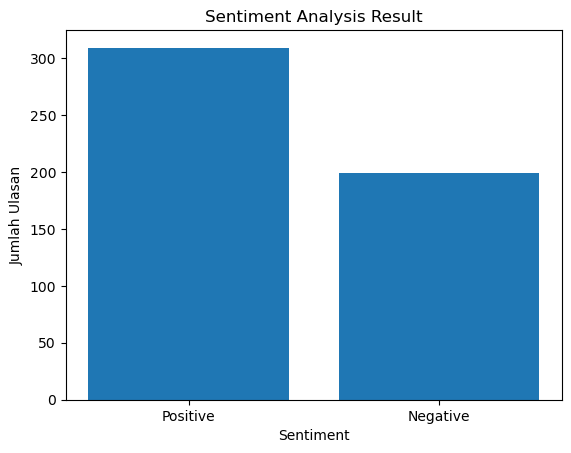

In [369]:
jumlah_positif = data['label'].value_counts()[1]
jumlah_negatif = data['label'].value_counts()[0]

plt.bar(['Positive', 'Negative'], [jumlah_positif, jumlah_negatif])
plt.title('Sentiment Analysis Result')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [370]:
import re

def casefolding(text):
    text = text.lower()                                # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)            # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                 # Menghapus karakter tanda baca
    text = text.strip()
    return text
data['text'] = data['text'].apply(casefolding)


In [371]:
print(data['text'].head())

0    masuk kabin sebelum take off dan keluar setela...
1    petugas lion air memasukkan sampah ke dalam ko...
2    ngantri sejam di check in counter pelayanannya...
3    pesawat saya dari pekanbaru ke batam jam  pagi...
4    kalau masih sayang diri keluarga waktu dan kes...
Name: text, dtype: object


In [372]:
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

more_stopword=['href','a','b','br']
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
    clean_words=[]
    text=text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [373]:
print(data['text'])

0      masuk kabin sebelum take off dan keluar setela...
1      petugas lion air memasukkan sampah ke dalam ko...
2      ngantri sejam di check in counter pelayanannya...
3      pesawat saya dari pekanbaru ke batam jam  pagi...
4      kalau masih sayang diri keluarga waktu dan kes...
                             ...                        
503    pramugari nya ramah ramah makanan nya enak ter...
504    terbang dengan batik air  rute cgksin a pklal ...
505    pertama kali saya naik batik air  fasilitasnya...
506    pengalaman saya hampir tiap tahun menggunakan ...
507    kalau pakai lion air tidak usah berekspetasi m...
Name: text, Length: 508, dtype: object


In [374]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [375]:
raw_sample = data['text'].iloc[7]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  flight dicancel tapi maskapai tidak memberikan informasi selengkapnya sehingga setelah saya reschedule dengan susah payah ke waktu  jam yg lain  ternyata lion sudah mengganti flgiht yg dicancel dg flight maskapai lain satu group pada jam yg sama waktu saya coba mengganti kembali ke jam semula customer service cs mengenakan biaya walaupun representative cs yg sebelumnya tidak memberitahukan adanya penggantian flight di waktu  jam yg sama  lebih parahnya waktu complain ke bagian keluhan bukannya membantu malah menyalahkan cara saya bertanya kepada cs sehingga saya mendapatkan informasi yg tdk lengkap  benarbenar tidak profesional dan tidak ada etos utk customer service  customer satisfaction sama sekali
Case folding		:  flight dicancel tapi maskapai tidak memberikan informasi selengkapnya sehingga setelah saya reschedule dengan susah payah ke waktu  jam yg lain  ternyata lion sudah mengganti flgiht yg dicancel dg flight maskapai lain satu group pada jam yg sama waktu saya co

In [376]:
def text_preprocessing_process(text):
    text=casefolding(text)
    text=remove_stop_words(text)
    text=stemming(text)
    return text

In [377]:
%%time
data['clean_text']=data['text'].apply(text_preprocessing_process)

CPU times: total: 3min 39s
Wall time: 4min 19s


In [378]:
import nltk
nltk.download('punkt')

data['tokens'] = data['clean_text'].apply(lambda x: nltk.word_tokenize(x))
print(data['tokens'])

0      [masuk, kabin, take, off, landing, struktur, b...
1      [tugas, lion, air, masuk, sampah, koper, tumpa...
2      [ngantri, jam, check, in, counter, layan, trus...
3      [pesawat, pekanbaru, batam, jam, pagi, rencana...
4      [sayang, keluarga, selamat, hindar, maskapai, ...
                             ...                        
503    [pramugari, nya, ramah, ramah, makan, nya, ena...
504    [terbang, batik, air, rute, cgksin, pklal, jam...
505    [kali, batik, air, fasilitas, muas, modern, la...
506    [alam, maskapai, kali, bawa, grup, bal, januar...
507    [pakai, lion, air, berekspetasi, berangkat, te...
Name: tokens, Length: 508, dtype: object


[nltk_data] Downloading package punkt to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [379]:
data

,text,label,clean_text,tokens
0,masuk kabin sebelum take off dan keluar setela...,0,masuk kabin take off landing struktur beranta ...,"[masuk, kabin, take, off, landing, struktur, b..."
1,petugas lion air memasukkan sampah ke dalam ko...,0,tugas lion air masuk sampah koper tumpang meng...,"[tugas, lion, air, masuk, sampah, koper, tumpa..."
2,ngantri sejam di check in counter pelayanannya...,0,ngantri jam check in counter layan trus yg pan...,"[ngantri, jam, check, in, counter, layan, trus..."
3,pesawat saya dari pekanbaru ke batam jam pagi...,0,pesawat pekanbaru batam jam pagi rencana batam...,"[pesawat, pekanbaru, batam, jam, pagi, rencana..."
4,kalau masih sayang diri keluarga waktu dan kes...,0,sayang keluarga selamat hindar maskapai pesawa...,"[sayang, keluarga, selamat, hindar, maskapai, ..."
...,...,...,...,...
503,pramugari nya ramah ramah makanan nya enak ter...,1,pramugari nya ramah ramah makan nya enak harga...,"[pramugari, nya, ramah, ramah, makan, nya, ena..."
504,terbang dengan batik air rute cgksin a pklal ...,1,terbang batik air rute cgksin pklal jam terban...,"[terbang, batik, air, rute, cgksin, pklal, jam..."
505,pertama kali saya naik batik air fasilitasnya...,1,kali batik air fasilitas muas modern layan vid...,"[kali, batik, air, fasilitas, muas, modern, la..."
506,pengalaman saya hampir tiap tahun menggunakan ...,1,alam maskapai kali bawa grup bal januari alas ...,"[alam, maskapai, kali, bawa, grup, bal, januar..."


In [380]:
data.to_csv('../data/csv/cleaned/lion-w2v-trial.csv')

In [381]:
import gensim
gensim.__version__

'4.3.0'

In [382]:
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_text'].apply(lambda x: tokenization(x.lower()))
sentences

0      [masuk, kabin, take, off, landing, struktur, b...
1      [tugas, lion, air, masuk, sampah, koper, tumpa...
2      [ngantri, jam, check, in, counter, layan, trus...
3      [pesawat, pekanbaru, batam, jam, pagi, rencana...
4      [sayang, keluarga, selamat, hindar, maskapai, ...
                             ...                        
503    [pramugari, nya, ramah, ramah, makan, nya, ena...
504    [terbang, batik, air, rute, cgksin, pklal, jam...
505    [kali, batik, air, fasilitas, muas, modern, la...
506    [alam, maskapai, kali, bawa, grup, bal, januar...
507    [pakai, lion, air, berekspetasi, berangkat, te...
Name: clean_text, Length: 508, dtype: object

In [383]:
MIN_COUNT = 1       # Mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
WINDOW = 5          # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah kalimat.
EPOCH = 15          # Jumlah iterasi (epoch).
SG = 1              # Algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW.
SIZE = 5

In [384]:
%%time 
model_word2vec = gensim.models.Word2Vec(sentences, vector_size=SIZE, sg=SG, min_count=MIN_COUNT, window=WINDOW, epochs=EPOCH)

CPU times: total: 1.06 s
Wall time: 976 ms


In [385]:
path = "word2vec.bin.gz"
model_word2vec.wv.save_word2vec_format(path, binary=True)

In [386]:
model_word2vec.wv['telat']

array([-0.44500825,  0.7976307 ,  0.9351086 , -0.52741253, -0.30199173],
      dtype=float32)

In [387]:
model_word2vec.wv.most_similar('telat')

[('maksimal', 0.9987533688545227),
 ('sesuain', 0.9977938532829285),
 ('dengar', 0.9969016313552856),
 ('pojok', 0.9967008829116821),
 ('nyalip', 0.9964655041694641),
 ('ribetsiiiiiiiiiiip', 0.9958056211471558),
 ('oke', 0.995578944683075),
 ('banting', 0.9953722357749939),
 ('sekian', 0.9953593015670776),
 ('spareparts', 0.9953112602233887)]

In [388]:
word_list = ['tepat', 'nyaman', 'bagus', 'ramah', 'senang']
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
word_vectors

array([[ 0.04760984,  0.823436  ,  0.88018256, -0.72321117,  0.19280858],
       [-0.16732343,  1.9976835 ,  0.05788337, -1.7335353 ,  0.33199733],
       [-0.01949726,  0.45800674,  0.7806487 , -1.3011154 ,  0.11680578],
       [-0.5321016 ,  2.0095923 , -0.19096811, -2.080621  , -0.3002533 ],
       [ 0.33468997,  1.0126555 ,  0.789425  , -0.8596443 ,  0.3361923 ]],
      dtype=float32)

In [389]:
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [390]:
red_word_vectors

array([[-0.8093591 , -0.21699136],
       [ 0.84137046, -0.9547705 ],
       [-0.6732861 ,  1.3317301 ],
       [ 1.3151484 ,  0.712173  ],
       [-0.6738733 , -0.8721433 ]], dtype=float32)

In [391]:
def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

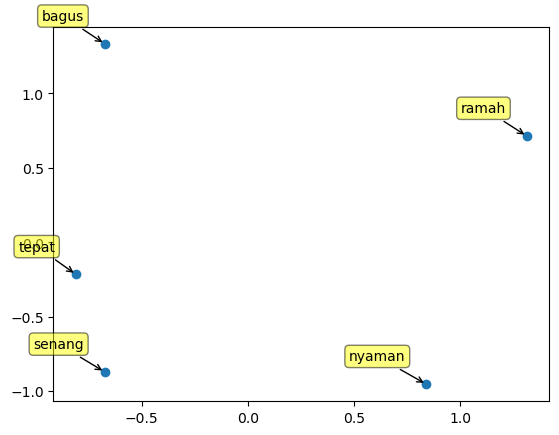

In [392]:
plot(red_word_vectors, word_list)

In [393]:
data1 = data[['clean_text', 'label']]
data1

,clean_text,label
0,masuk kabin take off landing struktur beranta ...,0
1,tugas lion air masuk sampah koper tumpang meng...,0
2,ngantri jam check in counter layan trus yg pan...,0
3,pesawat pekanbaru batam jam pagi rencana batam...,0
4,sayang keluarga selamat hindar maskapai pesawa...,0
...,...,...
503,pramugari nya ramah ramah makan nya enak harga...,1
504,terbang batik air rute cgksin pklal jam terban...,1
505,kali batik air fasilitas muas modern layan vid...,1
506,alam maskapai kali bawa grup bal januari alas ...,1


In [394]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=5)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=5)

In [395]:
print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(304, 4)
(102, 4)
(102, 4)


In [396]:
trainX = np.array(data_train.iloc[:, 0])
trainY = np.array(data_train.iloc[:, 1])

testX = np.array(data_test.iloc[:, 0])
testY = np.array(data_test.iloc[:, 1])

valX = np.array(data_val.iloc[:, 0])
valY = np.array(data_val.iloc[:, 1])

In [397]:
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values
valY = pd.get_dummies(valY).values

In [398]:
print(trainY.shape)
print(testY.shape)
print(valY.shape)

(304, 2)
(102, 2)
(102, 2)


In [399]:
trainY

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0,

In [400]:
from gensim.models import KeyedVectors

reloaded_word_vectors = KeyedVectors.load_word2vec_format(path, binary=True)
print(reloaded_word_vectors)

KeyedVectors<vector_size=5, 2487 keys>


In [401]:
from keras.preprocessing.text import Tokenizer

NUM_WORDS = 100
OOV_TOKEN = '<unk>'

tokenizer = Tokenizer(num_words=100, oov_token=OOV_TOKEN, lower=True)   
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

word_index = tokenizer.word_index
print(word_index)

{'<unk>': 1, 'saya': 2, 'dan': 3, 'yang': 4, 'lion': 5, 'di': 6, 'jam': 7, 'tidak': 8, 'ke': 9, 'air': 10, 'penerbangan': 11, 'dengan': 12, 'pesawat': 13, 'ini': 14, 'maskapai': 15, 'delay': 16, 'ada': 17, 'dari': 18, 'bali': 19, 'untuk': 20, 'waktu': 21, 'karena': 22, 'sangat': 23, 'hanya': 24, 'penumpang': 25, 'yg': 26, 'sudah': 27, 'saat': 28, 'pelayanan': 29, 'cukup': 30, 'saja': 31, 'tiap': 32, 'lebih': 33, 'murah': 34, 'juga': 35, 'harga': 36, 'ya': 37, 'terbang': 38, 'tapi': 39, 'itu': 40, 'ramah': 41, 'nyaman': 42, 'lagi': 43, 'bagasi': 44, 'kami': 45, 'naik': 46, 'berangkat': 47, 'bisa': 48, 'nya': 49, 'aja': 50, 'sekitar': 51, 'pada': 52, 'harus': 53, 'sampai': 54, 'banyak': 55, 'bandara': 56, 'kali': 57, 'masih': 58, 'jadwal': 59, 'bukan': 60, 'pasti': 61, 'pas': 62, 'lain': 63, 'sering': 64, 'pake': 65, 'sebenarnya': 66, 'tiket': 67, 'tepat': 68, 'namun': 69, 'harganya': 70, 'akan': 71, 'buat': 72, 'jakarta': 73, 'baru': 74, 'flight': 75, 'dalam': 76, 'sampe': 77, 'siang': 

In [402]:
len(word_index)

2556

In [403]:
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

print(train_seqs)

[[1, 14, 1, 64, 1, 1, 11, 12, 82, 15, 4, 1, 14, 97, 16, 1, 12, 11, 4, 2, 1, 1, 1, 14, 1, 1, 22, 12, 59, 4, 30, 68, 21], [55, 26, 1, 1, 15, 14, 71, 1, 26, 1, 48, 1, 23, 1, 1, 1, 1, 11, 26, 1, 1, 1, 21, 26, 1, 1, 21, 1, 38, 1, 1, 1, 1], [11, 83, 80, 4, 34, 95, 72, 98, 1, 1, 1, 29, 41, 3, 30, 42], [2, 18, 1, 1, 46, 1, 10, 16, 1, 7, 1, 6, 1, 1, 9, 73, 1, 5, 10, 1, 1, 50, 16, 7, 59, 7, 1, 1, 54, 3, 1, 17, 1, 1, 21, 1, 7, 99, 6, 56, 1, 1, 7, 99, 6, 56, 1], [5, 10, 1, 1, 1, 1, 1, 1, 86, 55, 35, 1, 16, 1, 6, 1, 1, 1, 2, 8, 1, 1, 1, 1, 14, 1, 31], [2, 1, 5, 10, 3, 11, 5, 10, 1, 1, 1, 15, 11, 1, 1, 2, 14, 1, 1, 1, 11, 1, 5, 10, 23, 1, 1, 1, 1, 8, 1, 97, 28, 1, 57, 59, 1, 53, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 25, 15, 35, 1, 8, 1, 1, 76, 1, 29, 4, 1, 1, 1, 25, 4, 1, 1, 1, 1, 1, 6, 76, 13, 35, 8, 1, 1, 22, 1, 2, 1, 1, 11, 12, 15, 14, 12, 1, 1, 4, 8, 1, 1, 1, 2, 23, 8, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 6, 76, 1, 13, 23, 8, 1, 1, 1, 1, 4, 1, 35, 8, 1, 2, 23, 1, 1, 15, 14, 1, 1, 3, 33, 87, 1

In [404]:
print(trainX[10])
print(train_seqs[10])

secara umum menyenangkan namun sempat delay dengan alasan yang kurang jelas kalau traveling sendiri saya tidak akan merekomendasikan maskapai ini namun kalau bersama kelompok mungkin bisa dipertimbangkan karena ongkosnya yang murah dan destinasinya yang luas tempat duduk biasa saja dan nyaman banyak penumpang yang membawa tentengan dan bungkusan sehingga kabin penuh sesak
[1, 1, 1, 69, 1, 16, 12, 1, 4, 1, 1, 92, 1, 1, 2, 8, 71, 1, 15, 14, 69, 92, 1, 1, 1, 48, 1, 22, 1, 4, 34, 3, 1, 4, 1, 1, 1, 1, 31, 3, 42, 55, 25, 4, 1, 1, 3, 1, 1, 1, 1, 1]


In [405]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

l = [len(i) for i in train_seqs]
l = np.array(l)

print('minimum number of words: {}'.format(l.min()))
print('median number of words: {}'.format(np.median(l)))
print('average number of words: {}'.format(l.mean()))
print('maximum number of words: {}'.format(l.max()))

minimum number of words: 13
median number of words: 33.0
average number of words: 49.07565789473684
maximum number of words: 317


In [406]:
PADDING = 'pre'

train_seqs = pad_sequences(train_seqs, padding=PADDING)
val_seqs = pad_sequences(val_seqs, padding=PADDING)
test_seqs = pad_sequences(test_seqs, padding=PADDING)

In [407]:
print(trainX[10])
print(train_seqs[10])

secara umum menyenangkan namun sempat delay dengan alasan yang kurang jelas kalau traveling sendiri saya tidak akan merekomendasikan maskapai ini namun kalau bersama kelompok mungkin bisa dipertimbangkan karena ongkosnya yang murah dan destinasinya yang luas tempat duduk biasa saja dan nyaman banyak penumpang yang membawa tentengan dan bungkusan sehingga kabin penuh sesak
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [408]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import SGD

epochs= 35
learning_rate = 0.5
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

model= Sequential()
model.add(Embedding(len(word_index),200))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


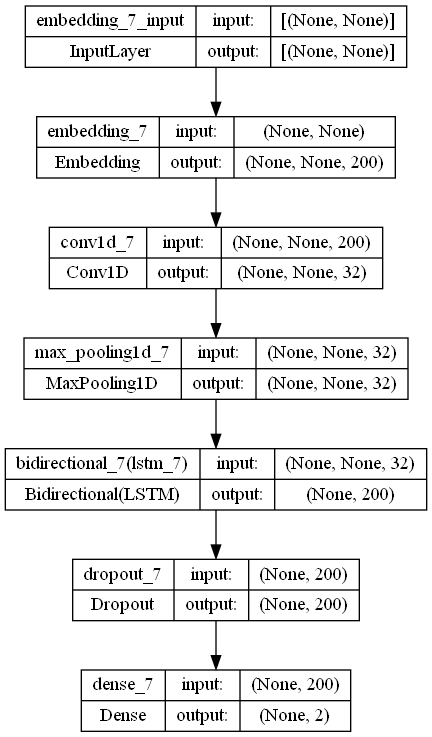

In [409]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [410]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [411]:
%%time

EPOCH = epochs
BATCH_SIZE = 35

history_LSTM = model.fit(train_seqs, trainY, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/35
9/9 [==============================] - 9s 380ms/step - loss: 0.6734 - accuracy: 0.5658 - val_loss: 0.6580 - val_accuracy: 0.5686
Epoch 2/35
9/9 [==============================] - 2s 240ms/step - loss: 0.6081 - accuracy: 0.6250 - val_loss: 0.5710 - val_accuracy: 0.7157
Epoch 3/35
9/9 [==============================] - 2s 254ms/step - loss: 0.5399 - accuracy: 0.7204 - val_loss: 0.4972 - val_accuracy: 0.7451
Epoch 4/35
9/9 [==============================] - 2s 234ms/step - loss: 0.4943 - accuracy: 0.7467 - val_loss: 0.4949 - val_accuracy: 0.7549
Epoch 5/35
9/9 [==============================] - 2s 263ms/step - loss: 0.4573 - accuracy: 0.7796 - val_loss: 0.4622 - val_accuracy: 0.7843
Epoch 6/35
9/9 [==============================] - 2s 247ms/step - loss: 0.4250 - accuracy: 0.8026 - val_loss: 0.4518 - val_accuracy: 0.7745
Epoch 7/35
9/9 [==============================] - 2s 234ms/step - loss: 0.3662 - accuracy: 0.8421 - val_loss: 0.5031 - val_accuracy: 0.6961
Epoch 8/35
9/9 [====

In [412]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

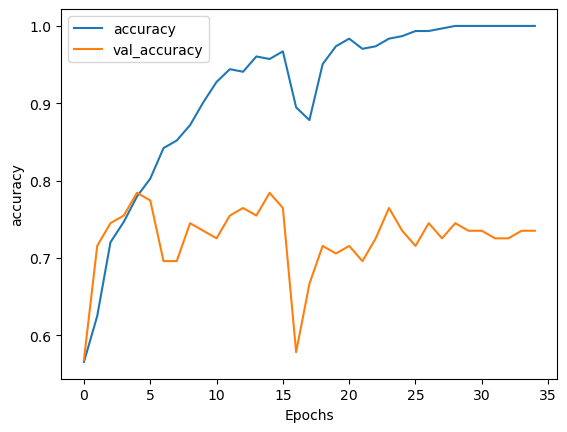

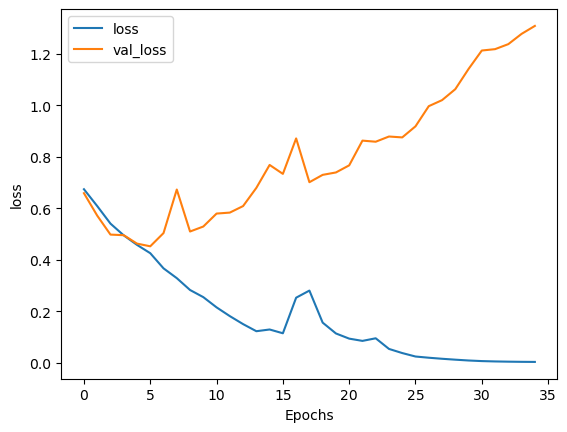

In [413]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [414]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.565789 	   0.673388 	   0.568627 	   0.657993
       2   0.625000 	   0.608066 	   0.715686 	   0.570952
       3   0.720395 	   0.539875 	   0.745098 	   0.497213
       4   0.746711 	   0.494280 	   0.754902 	   0.494910
       5   0.779605 	   0.457297 	   0.784314 	   0.462224
       6   0.802632 	   0.424987 	   0.774510 	   0.451772
       7   0.842105 	   0.366167 	   0.696078 	   0.503090
       8   0.851974 	   0.328128 	   0.696078 	   0.672198
       9   0.871711 	   0.282069 	   0.745098 	   0.509209
      10   0.901316 	   0.254347 	   0.735294 	   0.528551
      11   0.927632 	   0.214625 	   0.725490 	   0.578876
      12   0.944079 	   0.180627 	   0.754902 	   0.582669
      13   0.940789 	   0.149575 	   0.764706 	   0.608009
      14   0.960526 	   0.122021 	   0.754902 	   0.678680
      15   0.957237 	   0.128718 	   0.784314 	   0.767756
      16   0.967105 	   0.114010 	   0.764706 

In [415]:
y_pred = np.argmax(model.predict(test_seqs), axis=1)
y_true = np.argmax(testY, axis=1)

loss, accuracy = model.evaluate(test_seqs, testY)

4/4 [==============================] - 2s 36ms/step - loss: 1.5852 - accuracy: 0.7059


In [416]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.53      0.59      0.56        32
           1       0.80      0.76      0.78        70

    accuracy                           0.71       102
   macro avg       0.67      0.68      0.67       102
weighted avg       0.72      0.71      0.71       102

